<a href="https://colab.research.google.com/github/tommyEzreal/study_low_level/blob/main/NLP/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%EB%94%A5%EB%9F%AC%EB%8B%9D2/chapter02/dist_representation_of_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
! git clone https://github.com/WegraLee/deep-learning-from-scratch-2

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 606 (delta 259), reused 247 (delta 247), pack-reused 305
Receiving objects: 100% (606/606), 29.81 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (374/374), done.


**how computer understand the semantic of word**
- stanford CS224d: DL for NLP 

thesaurus(synonym dict) > WordNet

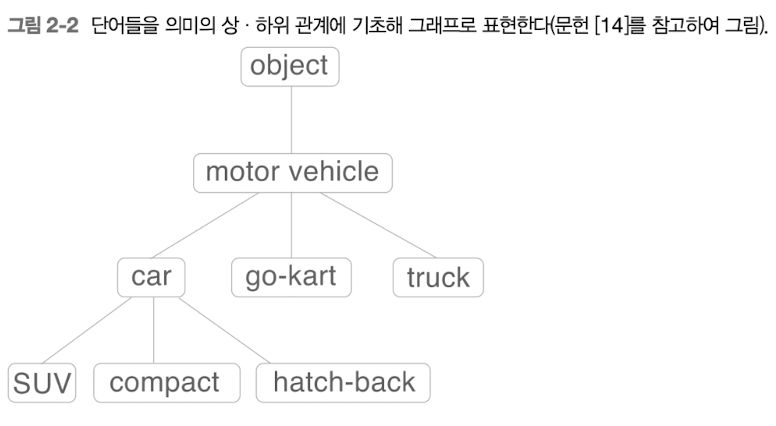

**probelm of thesaurus**

- 시대 변화에 대응하기 어렵다.

- 신조어, 단어의 의미 변화 등
사람을 쓰는 비용이 크다.

- 단어의 미묘한 차이를 표헌할 수 없다.

-> statistical approach & inference based approach

**statistical approach**

**corpus**

In [3]:
text = 'You say goodbye and i say hello.'

text = text.lower() # lower case 
text = text.replace('.', ' .') # replace
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [5]:
# or use regular expression
import re
text = 'You say goodbye and i say hello.'
re.split('(\W+)?',text)

['',
 None,
 'Y',
 None,
 'o',
 None,
 'u',
 ' ',
 '',
 None,
 's',
 None,
 'a',
 None,
 'y',
 ' ',
 '',
 None,
 'g',
 None,
 'o',
 None,
 'o',
 None,
 'd',
 None,
 'b',
 None,
 'y',
 None,
 'e',
 ' ',
 '',
 None,
 'a',
 None,
 'n',
 None,
 'd',
 ' ',
 '',
 None,
 'i',
 ' ',
 '',
 None,
 's',
 None,
 'a',
 None,
 'y',
 ' ',
 '',
 None,
 'h',
 None,
 'e',
 None,
 'l',
 None,
 'l',
 None,
 'o',
 '.',
 '',
 None,
 '']

In [6]:
# word: word_id dict

word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(word_to_id)
print(id_to_word)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [7]:
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

전체 전처리 과정 preprocess라는 function으로 


In [8]:
def preprocess(text):
    text = text.lower() # do lower case
    text = text.replace('.', ' .') # 맞춤표 사이 공백 만들기
    
    words = text.split(' ') # 공백 기준 단어단위 분절 

    # word to index 
    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    # 입력 text의 id array 생성 
    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [9]:
preprocess(text)

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

**distributed word representation**

word to vector


base of dist representaiton of word 
:*distribution hypothesis*

= the semantic of a word is decided by the context 

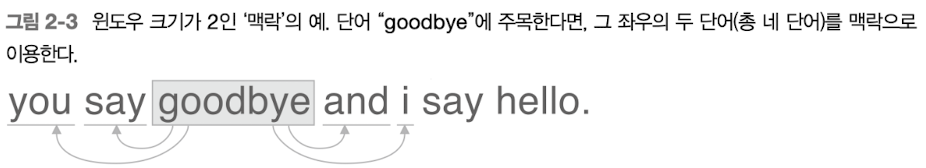

statistical based method for word2vec

In [10]:
%cd /content/deep-learning-from-scratch-2
import sys
sys.path.append('..')
from common.util import preprocess

/content/deep-learning-from-scratch-2


In [11]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

corpus, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

**Co-occurence Matrix**

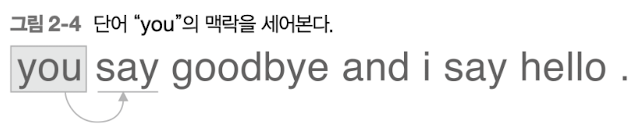

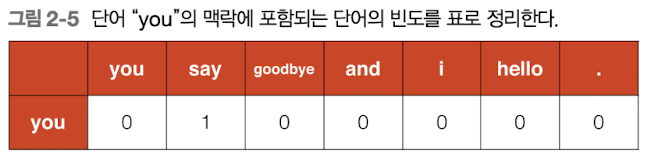

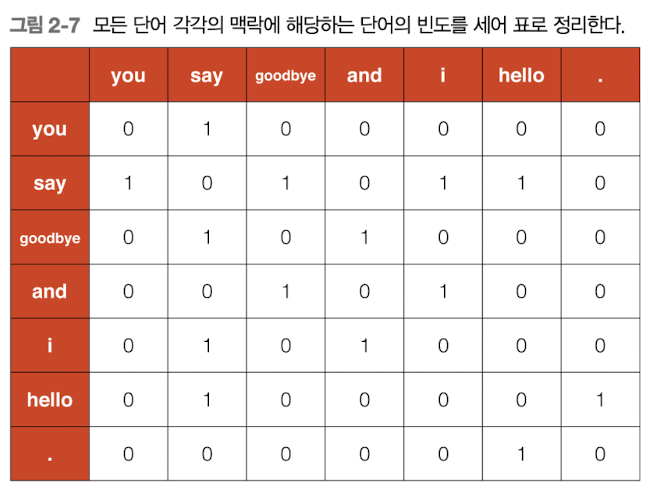

In [12]:
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0]
])

C[0], C[4], C[word_to_id['goodbye']]

(array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 0]))

In [13]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [14]:
# make C 

def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx-i # 오른쪽, 왼쪽 문맥 
            right_idx = idx+i    # window 만큼 칸수 이동한 범위 
            
            if left_idx >= 0: # word_id가 첫번째word가 아니라면 
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] +=1 
                # co_matrix의 (word_idx, 왼쪽 idx)성분 +1 

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1 

    return co_matrix



In [15]:
text = "You say goodbye and I say hello."
corpus , word_to_id, id_to_word = preprocess(text)

vocab_size = len(corpus)

print("co-matrix of 'You say goodbye and I say hello.:")
create_co_matrix(corpus, vocab_size, window_size=1)

co-matrix of 'You say goodbye and I say hello.:


array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

*Cosine Similarity*

* calculate vector similarity

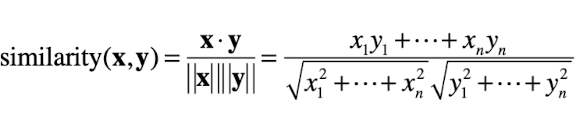

In [16]:
# cosine similarity between word vecs

def cos_sim(x, y , eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2)+ eps) # x_norm
    ny = y / np.sqrt(np.sum(y**2)+ eps) # y_norm

    return np.dot(nx,ny) # dot-product of xy


In [17]:
C = create_co_matrix(corpus, vocab_size, window_size=1)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
c2 = C[word_to_id['say']]

# cos-sim between 'you' and 'i'
print(cos_sim(c0,c1))
print(cos_sim(c0,c2))

0.7071067758832467
0.0


In [18]:
# similartiy rank

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print('not found error.' % query)
        return 

    print('\n[query]:' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # calculate cosin-sim / all by once
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_sim(word_matrix[i], query_vec)
    
    count = 0
    # 내림차순 정렬 (-1* & argsort()) / array의 index 반환
    for i in (-1 * similarity).argsort():  # 유사도가 높은 값의 idx부터 접근 
        if id_to_word[i] == query: 
            continue # query와 같은 word의 index는 예외처리  
        
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        count +=1
        if count >=top: # top 몇개 출력 여부에 따라 
            return 


In [19]:
x = np.array([100,-20, 2])
(-x).argsort()

array([0, 2, 1])

In [20]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query]:you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


**improve statistical method**

- 단순 등장빈도 계산방식의 문제 
- pointwise mutual information (PMI) method

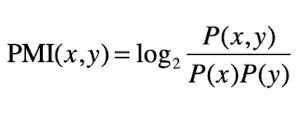

ex) 
- vocab_size = 10,000
- 'the' appears 100 times
- 'the' & 'car' simultaneously 10 times 
- P('the') in corpus : 0.01
- P('the','car') in corpus: 0.001

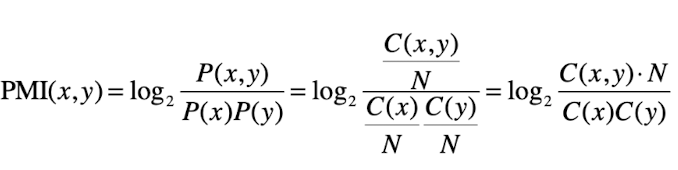

* N = num_words in corpus
* C = co-occurence matrix
* C() = count 

*단어가 단독으로 출현하는 횟수가 고려됨*

problem of PMI:

 - if co-occur == 0:
    - log0 = infinity

 -> PPMI

 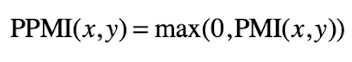

In [21]:
np.zeros_like(C).shape,np.sum(C), np.sum(C, axis=0)

((8, 8), 14, array([1, 4, 2, 2, 2, 2, 1, 0]))

In [22]:
# PPMI

def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32) 
    N = np.sum(C) # Num corpus
    S = np.sum(C, axis=0) # num each word appearance
    total = C.shape[0] * C.shape[1]
    
    cnt = 0
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j] * N / (S[j] * S[i]) + eps)
            M[i,j] = max(0,pmi) # PPMI

            if verbose:
                cnt +=1
                if cnt % (total // 100) ==0:
                    print('%.1f%% complete' % (100*cnt/total)) # 100번째마다 출력 
    return M


In [23]:
M = ppmi(C)
print(M)

[[0.        1.8073549 0.        0.        0.        0.        0.
  0.       ]
 [1.8073549 0.        0.8073549 0.        0.8073549 0.8073549 0.
  0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.
  0.       ]
 [0.        0.        1.8073549 0.        1.8073549 0.        0.
  0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.
  0.       ]
 [0.        0.8073549 0.        0.        0.        0.        2.807355
  0.       ]
 [0.        0.        0.        0.        0.        2.807355  0.
  0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.       ]]


<ipython-input-22-bf2ea0044715>:12: RuntimeWarning: invalid value encountered in long_scalars
  pmi = np.log2(C[i,j] * N / (S[j] * S[i]) + eps)


In [24]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

print(C)
print('-----')
print("PPMI:")
print(W)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
-----
PPMI:
[[0.        1.8073549 0.        0.        0.        0.        0.       ]
 [1.8073549 0.        0.8073549 0.        0.8073549 0.8073549 0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.        1.8073549 0.        1.8073549 0.        0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.8073549 0.        0.        0.        0.        2.807355 ]
 [0.        0.        0.        0.        0.        2.807355  0.       ]]


**Problem of PPMI**

- dimension of word vector 
- -> dim reduction

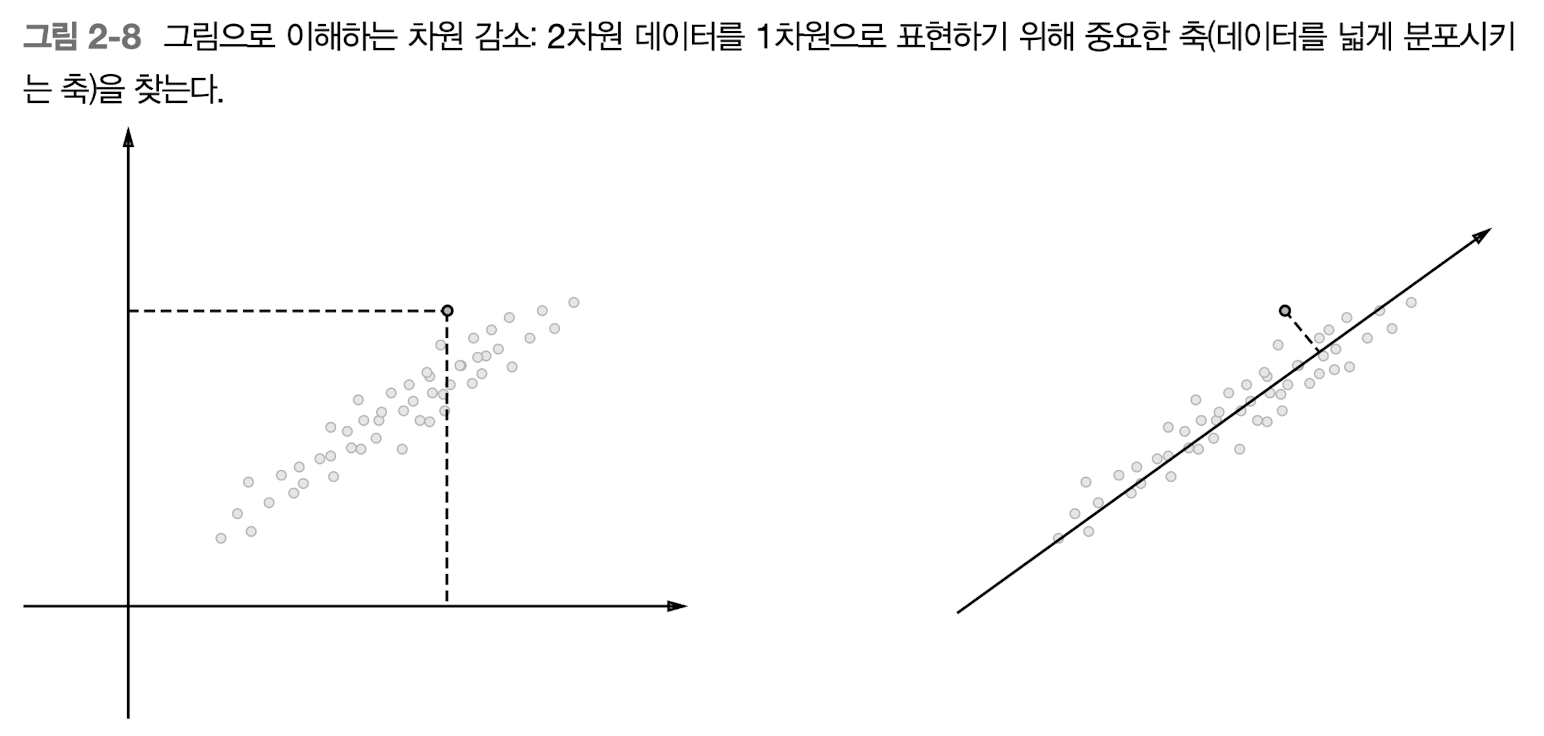


trun ***sparse*** vector into ***dense*** vector

**SVD**

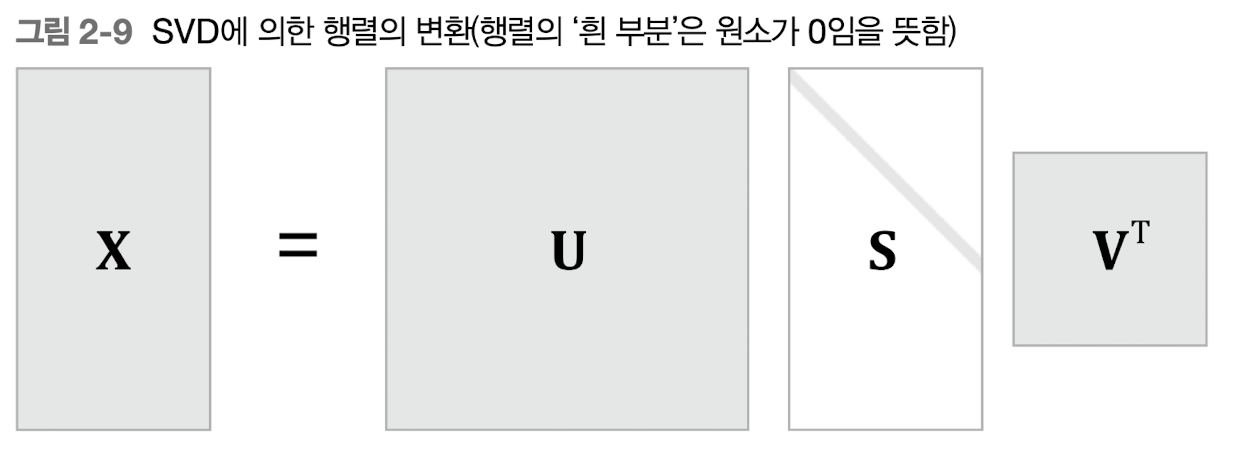

* U = orthogonal matrix
    = basis 
    = word vector space
* S = diagonal matrix
    = singular values
    = importance of the basis 
* if **S** values are low, those are reduction target

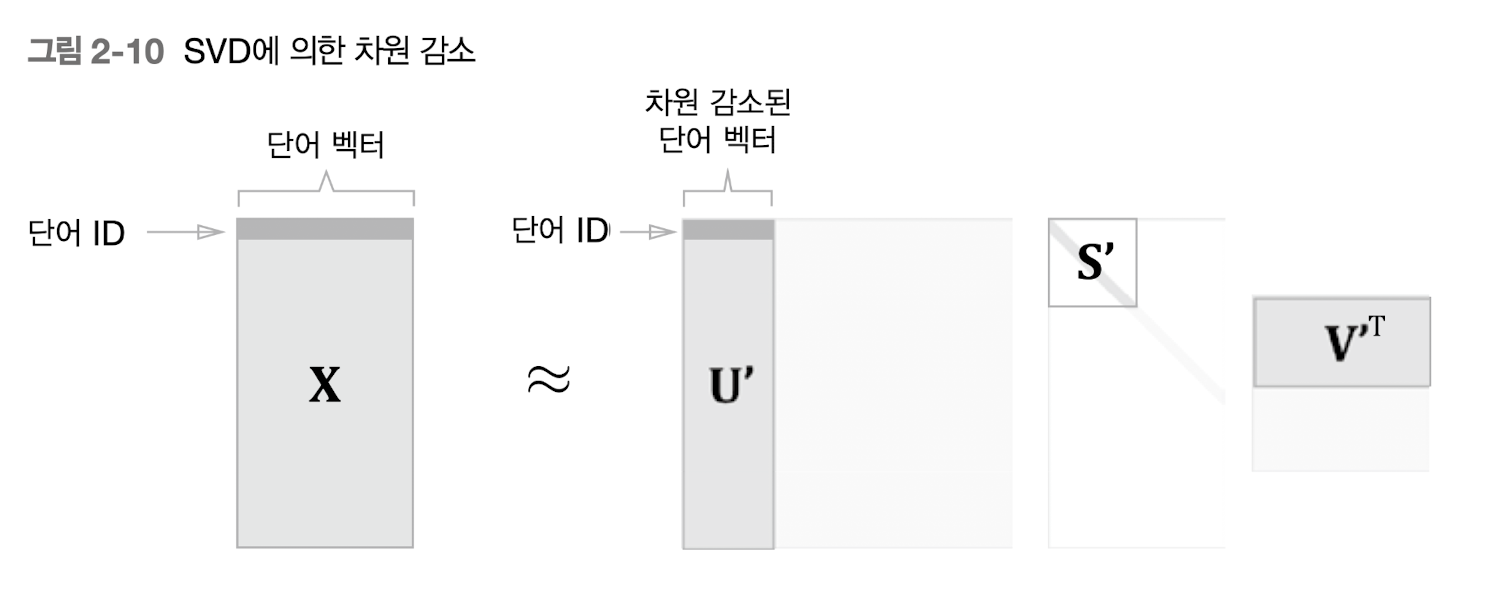

In [25]:
# apply to PPMI

# use linalg library 
U, S, V = np.linalg.svd(W)

print(U.shape)
print(S.shape)
print(S)
print(V.shape)

(7, 7)
(7,)
[3.1680453e+00 3.1680453e+00 2.7029872e+00 2.7029872e+00 1.5144811e+00
 1.5144811e+00 4.1317175e-17]
(7, 7)


In [26]:
# compare
print("C[0]: co-occurence word vec")
print(C[0])
print('--------------------------')
print("W[0]: before SVD / sparse")
print(W[0])
print('--------------------------')
print("U[0]: after SVD / dense")
print(U[0])

C[0]: co-occurence word vec
[0 1 0 0 0 0 0]
--------------------------
W[0]: before SVD / sparse
[0.        1.8073549 0.        0.        0.        0.        0.       ]
--------------------------
U[0]: after SVD / dense
[ 3.4094876e-01 -1.1102230e-16 -1.2051624e-01 -4.1633363e-16
 -9.3232495e-01 -1.1102230e-16 -2.4257469e-17]


In [27]:
# reduce dimension with sparse vector
U[0,:2] # 2 dim 

array([ 3.4094876e-01, -1.1102230e-16], dtype=float32)

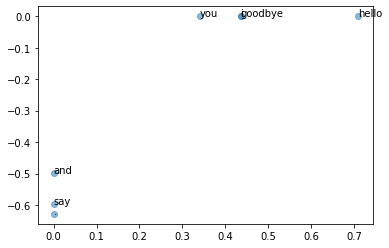

In [28]:
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:,1], alpha = 0.5)
plt.show()

PTB Dataset

In [29]:
# chap02/show_ptb.py
import sys
sys.path.append('..')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [30]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

print('---------------------------')
print("make co-occurence matrix..")
C = create_co_matrix(corpus, vocab_size, window_size)

print('---------------------------')
print('calculate PPMI..')
W = ppmi(C, verbose=True)

print('SVD..')

# compare SKLEARN truncated_svd vs numpt linalg og svd
try:
    from sklearn.utils.extmath import randomized_svd
    U,S,V = randomized_svd(W, n_components = wordvec_size, n_iter=5, random_state=None)


except ImportError:
    U,S,V = np.linalg.svd(W)


word_vecs = U[:, :wordvec_size]

# use most_similar function / find top k similar word 
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id,id_to_word, word_vecs, top=5)



---------------------------
make co-occurence matrix..
---------------------------
calculate PPMI..
1.0% complete
2.0% complete
3.0% complete
4.0% complete
5.0% complete
6.0% complete
7.0% complete
8.0% complete
9.0% complete
10.0% complete
11.0% complete
12.0% complete
13.0% complete
14.0% complete
15.0% complete
16.0% complete
17.0% complete
18.0% complete
19.0% complete
20.0% complete
21.0% complete
22.0% complete
23.0% complete
24.0% complete
25.0% complete
26.0% complete
27.0% complete
28.0% complete
29.0% complete
30.0% complete
31.0% complete
32.0% complete
33.0% complete
34.0% complete
35.0% complete
36.0% complete
37.0% complete
38.0% complete
39.0% complete
40.0% complete
41.0% complete
42.0% complete
43.0% complete
44.0% complete
45.0% complete
46.0% complete
47.0% complete
48.0% complete
49.0% complete
50.0% complete
51.0% complete
52.0% complete
53.0% complete
54.0% complete
55.0% complete
56.0% complete
57.0% complete
58.0% complete
59.0% complete
60.0% complete
61.0% com

visualization 

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(U[1000:1100,:])

In [33]:
vocab = list(id_to_word.values())
df = pd.DataFrame(X_tsne, index=vocab[1000:1100], columns=['x', 'y'])
print(df.shape)
df.head(10)

(100, 2)


,x,y
dec.,-0.853934,-2.741845
ruling,-2.042578,-2.289960
slash,0.191393,-0.535600
earnings,-2.106870,0.862453
spokesman,1.126051,-3.131510
tracking,0.514549,0.100979
whose,-1.147497,1.382486
addresses,0.221267,-0.366391
changed,-0.976600,-0.884731
past,-0.610611,0.950565


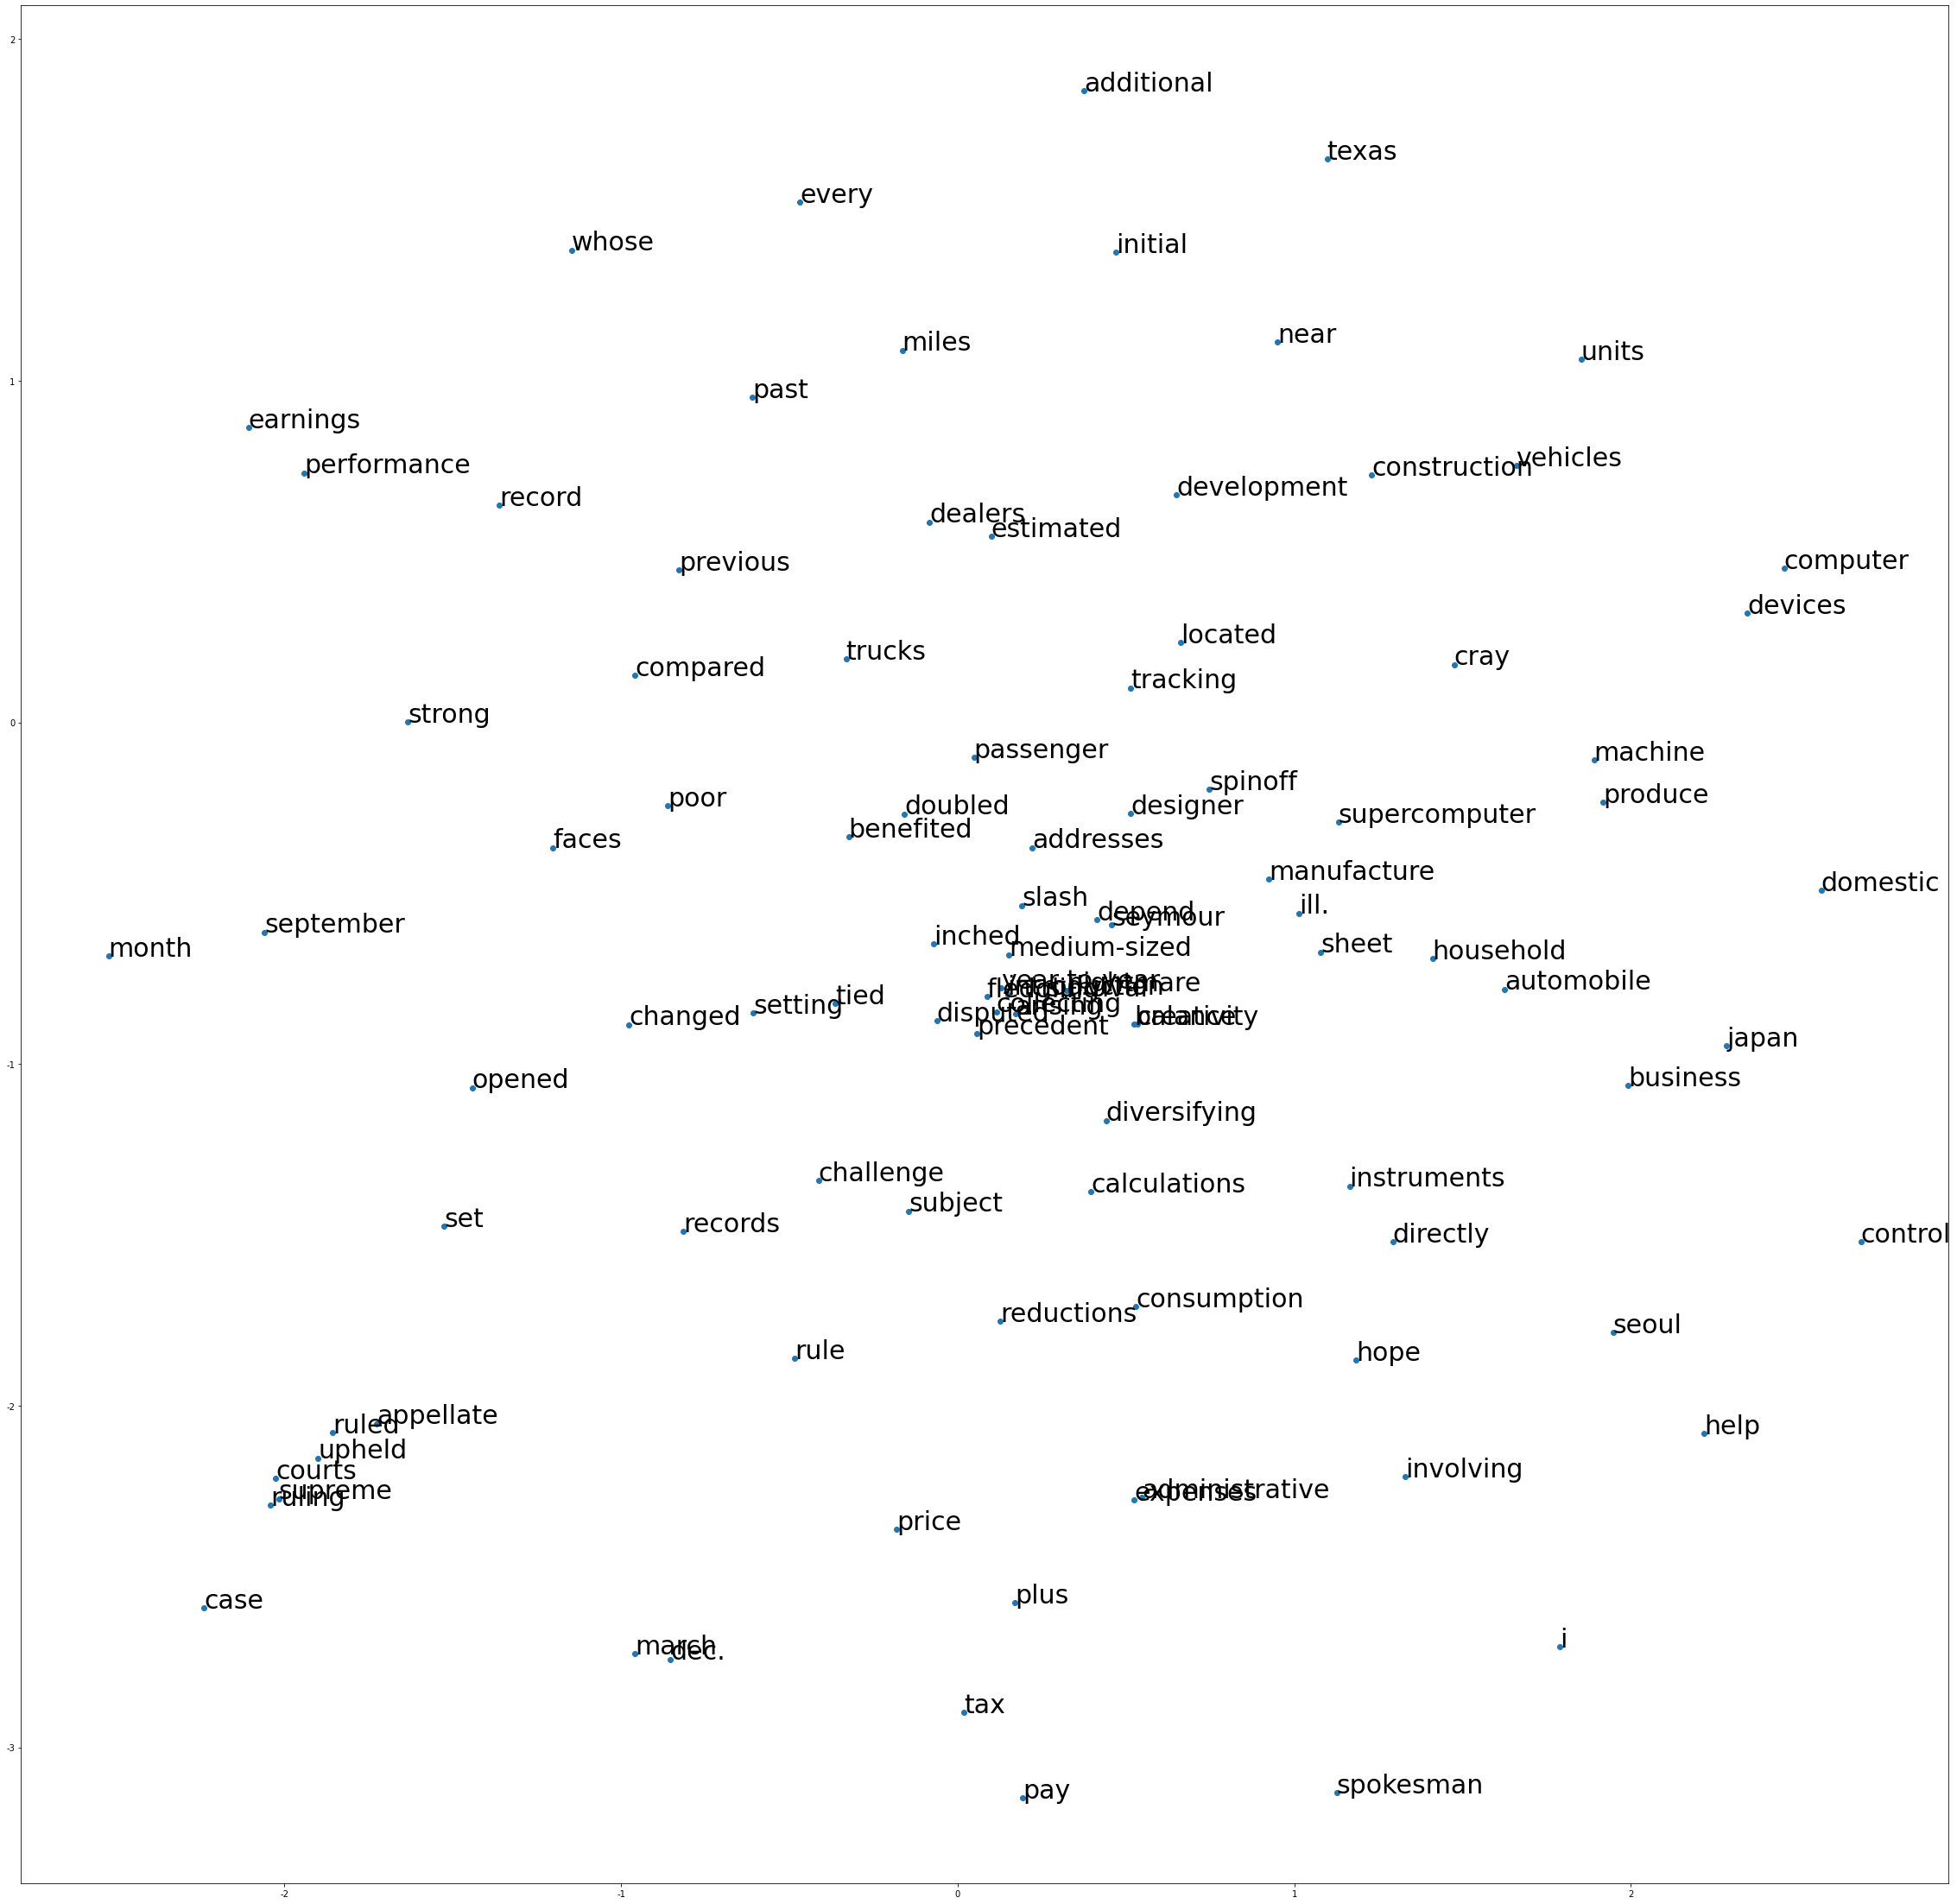

In [37]:
fig = plt.figure()
fig.set_size_inches(40, 40)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()